In [ ]:
### Ce notebook reprend le notebook essai_juliette (pour éviter les conflits) puis industries_polluantes_aurélian

In [1]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#### On importe le fichier répertoriant les installations industrielles rejetant des polluants

import requests

# Téléchargement du fichier avec la localisation des installations industrielles rejetant des polluants, directement depuis le site Géorisques
url_industries_polluantes = "https://files.georisques.fr/irep/2023.zip"
response_industries_polluantes = requests.get(url_industries_polluantes)

# Enregistrement du fichier localement
with open("Industries_polluantes.xlsx", "wb") as f:
    f.write(response_industries_polluantes.content)

# On importe le fichier

import zipfile

with zipfile.ZipFile("Industries_polluantes.xlsx", "r") as z:
    with z.open("2023/etablissements.csv") as f:
        industries_polluantes = pd.read_csv(f, sep=None, engine='python')

# On renomme la colonne insee dès maintenant (pour harmoniser ensuite)
industries_polluantes = industries_polluantes.rename(columns={"code_insee" : "insee"})
industries_polluantes.head()

# On importe le fichier des rejets
with zipfile.ZipFile("Industries_polluantes.xlsx", "r") as z:
    with z.open("2023/rejets.csv") as f:
        rejets = pd.read_csv(f, sep=None, engine='python')
rejets = rejets.rename(columns = {"code_insee" : "insee"})
rejets.head()

,identifiant,nom_etablissement,code_postal,insee,commune,code_departement,departement,code_region,region,annee_rejet,rejet_raccorde_m3_par_an,rejet_isole_m3_par_an
0,3012489,CARRIERES & MATERIAUX NORD-EST,51150,51303,JALONS,51,MARNE,44,GRAND-EST,2023,NaN,167850.0
1,3012512,ETABLISSEMENTS BLANDIN SA,51300,51433,PLICHANCOURT,51,MARNE,44,GRAND-EST,2023,NaN,59277.0
2,3012705,KNAUF INSULATION LANNEMEZAN,57970,57343,ILLANGE,57,MOSELLE,44,GRAND-EST,2023,0.0,0.0
3,3013146,METABOLIC EXPLORER,57500,57606,SAINT-AVOLD,57,MOSELLE,44,GRAND-EST,2023,55597.0,NaN
4,3014130,AFYREN NEOXY,57500,57606,SAINT-AVOLD,57,MOSELLE,44,GRAND-EST,2023,7647.0,NaN


In [3]:
## On merge les deux tables
etablissements_rejets = pd.merge(industries_polluantes, rejets, on=["identifiant", "nom_etablissement", "code_postal", "insee",
"commune", "code_departement", "departement", "code_region", "region"], how="inner")
etablissements_rejets.head()

,identifiant,nom_etablissement,numero_siret,adresse,code_postal,insee,commune,code_departement,departement,code_region,...,coordonnees_x,coordonnees_y,code_epsg,code_ape,libelle_ape,code_eprtr,libelle_eprtr,annee_rejet,rejet_raccorde_m3_par_an,rejet_isole_m3_par_an
0,6101980,FERROGLOBE FRANCE,64200517700265,USINE D'ANGLEFORT,1350,01010,ANGLEFORT,01,AIN,84.0,...,5.81144,45.90610,4326.0,2410Z,Sidérurgie,2.(e).(i),destinées à la production de métaux bruts non ...,2023,NaN,2253116.0
1,6101989,KEM ONE,53869504000039,258 route de Saint Maurice de Gourdans,1360,01027,BALAN,01,AIN,84.0,...,5.10000,45.84721,4326.0,2014Z,Fabrication d'autres produits chimiques organi...,4.(a).(viii),"matières plastiques de base (polymères, fibres...",2023,NaN,685463.0
2,6112329,SK FUNCTIONAL POLYMER,87995793400059,258 route de Saint Maurice de Gourdans,1360,01027,BALAN,01,AIN,84.0,...,5.10000,45.84721,4326.0,2016Z,Fabrication de matières plastiques de base,4.(a).(viii),"matières plastiques de base (polymères, fibres...",2023,NaN,94045.0
3,6108136,ELIAN,76020009700060,Z.I. Sud Plastics Vallée - BP 59,1100,01031,BELLIGNAT,01,AIN,84.0,...,5.62876,46.24919,4326.0,2012Z,Fabrication de colorants et de pigments,NaN,NaN,2023,1866.0,NaN
4,6102002,SYND INTERCOMMUNAL DE VALORISATION,25740162000030,"Z.I. d'ARLOD, 5 chemin de Tapey",1200,01033,BELLEGARDE-SUR-VALSERINE,01,AIN,84.0,...,5.81411,46.08494,4326.0,3821Z,Traitement et élimination des déchets non dang...,5.(b),Installations destinées à l'incinération des d...,2023,NaN,25903484.0


In [4]:
#### On importe le fichier avec les shapefiles des communes

# Téléchargement du fichier avec les shapefiles des communes, directement depuis Datagouv
url_communes = "https://www.data.gouv.fr/api/1/datasets/r/0e117c06-248f-45e5-8945-0e79d9136165"
zip_communes = "shapefiles.zip"

# Enregistrement du fichier localement
response_communes = requests.get(url_communes)
with open(zip_communes, "wb") as f:
    f.write(response_communes.content)

# Importation avec GeoPandas
communes = gpd.read_file(f"zip://{zip_communes}!communes-20220101.shp")
communes.head()

,insee,nom,wikipedia,surf_ha,geometry
0,2B222,Pie-d'Orezza,fr:Pie-d'Orezza,573.0,"POLYGON ((9.32017 42.38507, 9.32028 42.3851, 9..."
1,2B137,Lano,fr:Lano,824.0,"POLYGON ((9.2001 42.39013, 9.20014 42.39014, 9..."
2,2B051,Cambia,fr:Cambia,833.0,"POLYGON ((9.27757 42.37509, 9.27758 42.37512, ..."
3,2B106,Érone,fr:Érone,393.0,"POLYGON ((9.2512 42.37605, 9.25132 42.37603, 9..."
4,2B185,Oletta,fr:Oletta,2674.0,"POLYGON ((9.2834 42.66273, 9.28345 42.66273, 9..."


In [5]:
## On veut fusionner le df communes_statut avec des informations tirées de etablissements_rejets
## On a un problème : les arrondissements ne sont pas décrits dans le fichier des communes (mais ils le sont dans etablissements_rejets)

# On fusionne pour Paris, Lyon et Marseille
etablissements_rejets["insee"] = etablissements_rejets["insee"].replace(["13203", "13205", "13208", "13209", "13210", "13211", "13214", "13215", "13216"],
"13055").astype(str)
etablissements_rejets["insee"] = etablissements_rejets["insee"].replace(["69383", "69384", "69387", "69388", "69389"],"69123").astype(str)
etablissements_rejets["insee"] = etablissements_rejets["insee"].replace(["75101", "75109", "75111", "75112", "75115"],"75056").astype(str)

# On supprime les autres
etablissements_rejets.drop(etablissements_rejets[etablissements_rejets["insee"].isin(["14443", "27676", "33267", "49204", "49274", "49276", "50163",
"50460", "50602", "61356", "74093", "74181", "85212"])].index, inplace = True)

In [11]:
### Préparation du dataframe de travail

# On fait la jointure
df = pd.merge(communes, etablissements_rejets, on="insee", how = "inner")

# Conversion du fichier au format GeoPandas
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Création d'un dataframe avec seulement les communes polluées
communes_polluees = gdf.copy()
communes_polluees = communes_polluees[communes_polluees["insee"].isin(etablissements_rejets["insee"])]

# On crée un df avec les communes et une variable polluée ou non (binaire)
communes_statut = communes.copy()
communes_statut["Polluee"] = communes_statut["insee"].isin(communes_polluees["insee"])

# On regarde combien on en a (2 373 polluées parmi 34 955 : environ 7% (c'est bien !?))
print(communes_statut["Polluee"].sum(), communes.shape)

2378 (34955, 5)


In [12]:
communes_statut.head()

,insee,nom,wikipedia,surf_ha,geometry,Polluee
0,2B222,Pie-d'Orezza,fr:Pie-d'Orezza,573.0,"POLYGON ((9.32017 42.38507, 9.32028 42.3851, 9...",False
1,2B137,Lano,fr:Lano,824.0,"POLYGON ((9.2001 42.39013, 9.20014 42.39014, 9...",False
2,2B051,Cambia,fr:Cambia,833.0,"POLYGON ((9.27757 42.37509, 9.27758 42.37512, ...",False
3,2B106,Érone,fr:Érone,393.0,"POLYGON ((9.2512 42.37605, 9.25132 42.37603, 9...",False
4,2B185,Oletta,fr:Oletta,2674.0,"POLYGON ((9.2834 42.66273, 9.28345 42.66273, 9...",False


In [8]:
## On va réduire le df etablissements_rejets

# On regarde la taille et combien de communes uniques
print(etablissements_rejets.shape, etablissements_rejets["insee"].nunique(), etablissements_rejets.columns)

# On regroupe par la commune et on somme les rejets
etablissements_rejets_agr = etablissements_rejets.groupby("insee").agg(
    rejets_tot=("rejet_isole_m3_par_an", "sum"),
    nb_etablissements=("rejet_isole_m3_par_an", "count")
).reset_index()

(3915, 21) 2386 Index(['identifiant', 'nom_etablissement', 'numero_siret', 'adresse',
       'code_postal', 'insee', 'commune', 'code_departement', 'departement',
       'code_region', 'region', 'coordonnees_x', 'coordonnees_y', 'code_epsg',
       'code_ape', 'libelle_ape', 'code_eprtr', 'libelle_eprtr', 'annee_rejet',
       'rejet_raccorde_m3_par_an', 'rejet_isole_m3_par_an'],
      dtype='object')


In [9]:
# On fusionne etablissements_rejets_agr et communes_statut
communes_statut = pd.merge(communes_statut, etablissements_rejets_agr, on = "insee")

# On ne conserve que les villes qui ont un rejet isolé positif
communes_statut = communes_statut[communes_statut["rejets_tot"] > 0]

In [11]:
### On se concentre sur l'idf

# On crée un df communes seulement avec l'idf
communes["departement"] = communes["insee"].astype(str).str.slice(0,2)
communes_idf = communes.copy()
communes_idf = communes_idf[communes_idf["departement"].isin(["75", "77", "78", "91", "92", "93", "94", "95"])]

communes_polluees["departement"] = communes_polluees["insee"].astype(str).str.slice(0,2)
communes_polluees_idf = communes_polluees.copy()
communes_polluees_idf = communes_polluees_idf[communes_polluees_idf["departement"].isin(["75", "77", "78", "91", "92", "93", "94", "95"])]

# On crée un df avec les communes d'IDF et une variable polluée ou non (binaire)
communes_idf_statut = communes_idf.copy()
communes_idf_statut["Polluee"] = communes_idf["insee"].isin(communes_polluees_idf["insee"])

# On regarde combien on en a (157 polluées parmi 1 268 : environ 10% (c'est cool !))
print(communes_idf_statut["Polluee"].sum(), communes_idf.shape)

159 (1268, 6)


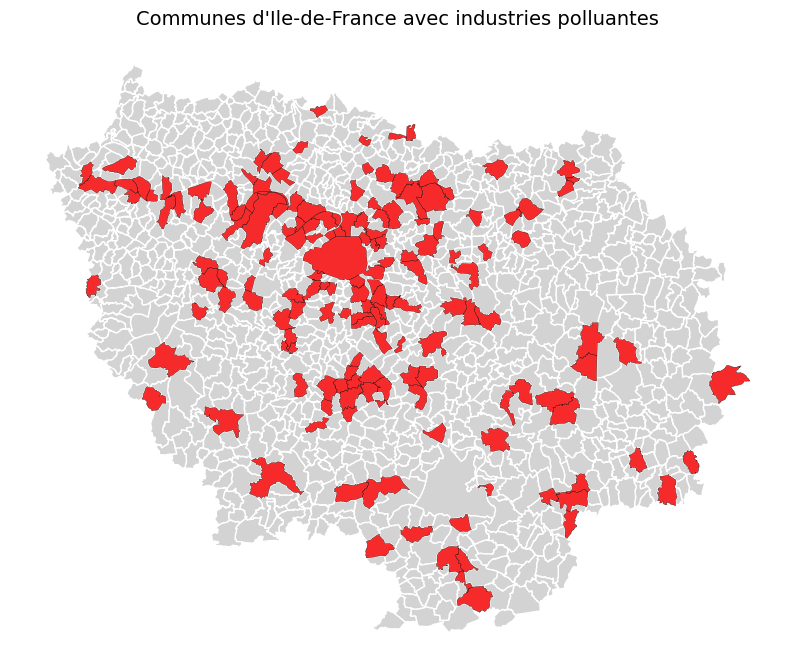

In [12]:
# On s'assure qu'on a bien un GeoDataFrame et on charge l'epsg=2154
communes_idf_statut = gpd.GeoDataFrame(communes_idf_statut)
communes_idf_statut = communes_idf_statut.to_crs(epsg=2154)

# On crée le graphique
fig, ax = plt.subplots(figsize=(10, 10))

communes_idf_statut.plot(ax=ax, color='lightgrey', edgecolor='white')

communes_idf_statut[communes_idf_statut["Polluee"]].plot(
    ax=ax,
    color='red',
    edgecolor='black',
    linewidth=0.3,
    alpha=0.8
)

ax.set_title("Communes d'Ile-de-France avec industries polluantes", fontsize=14)
ax.axis('off')

plt.show()


In [13]:
#### On importe le dossier complet de l'INSEE pour apparier avec des données "sociales"

# On télécharge le dossier qui contient notre csv
url_complet = "https://www.insee.fr/fr/statistiques/fichier/5359146/dossier_complet.zip"
zip_path = "dossier_complet.zip" 

# On enregistre le fichier localement
response = requests.get(url_complet)
with open(zip_path, "wb") as f:
    f.write(response.content)

# On importe notre fichier avec Pandas (et on l'appelle complet_insee)
csv_complet_insee = "dossier_complet.csv" 
with zipfile.ZipFile(zip_path) as z:
    with z.open(csv_complet_insee) as f:
        complet_insee = pd.read_csv(f, sep=';', encoding='utf-8')

/tmp/ipykernel_18168/1042689086.py:16: DtypeWarning: Columns (0,1701,1702) have mixed types. Specify dtype option on import or set low_memory=False.
  complet_insee = pd.read_csv(f, sep=';', encoding='utf-8')


In [14]:
#### On fait à nouveau la jointure avec notre df précédent

# On renomme la variable CODGEO en "insee" pour que ce soit homogène
complet_insee = complet_insee.rename(columns={"CODGEO":"insee"})

# On s'assure que la variable "insee" est similaire dans les deux tableaux
communes_idf_statut['insee'] = communes_idf_statut['insee'].astype(str).str.zfill(5)                     # zfill remplit de zéros à gauche pour atteindre 5 signes (pour harmoniser à la norme INSEE)
complet_insee['insee'] = complet_insee['insee'].astype(str).str.zfill(5)

# On fusionne
communes_idf_complet = pd.merge(communes_idf_statut, complet_insee, on="insee") # on obtient un tableau à 1982 colonnes (et 1 267 lignes)
communes_idf_complet.shape


(1267, 1982)

In [15]:
#### Notre super gdf contient 1980 colonnes : on prend la pauvreté uniquement pour la visualiser
## NB : on pourra essayer avec beaucoup d'autres indicateurs plus tard !!!

# On ne retient que les variables d'intérêt
communes_idf_pauvrete = communes_idf_complet.copy()
communes_idf_pauvrete = communes_idf_pauvrete[['insee', 'nom', 'surf_ha', 'geometry', 'departement', 'TP6021']]

# On renomme TP6021 en taux_pauvrete
communes_idf_pauvrete = communes_idf_pauvrete.rename(columns = {"TP6021" : "taux_pauvrete"})

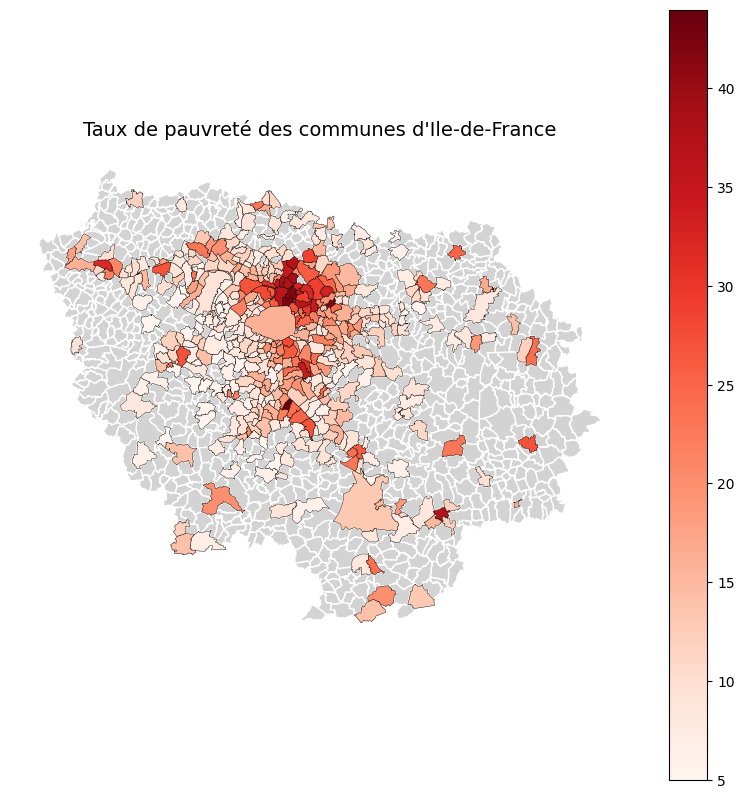

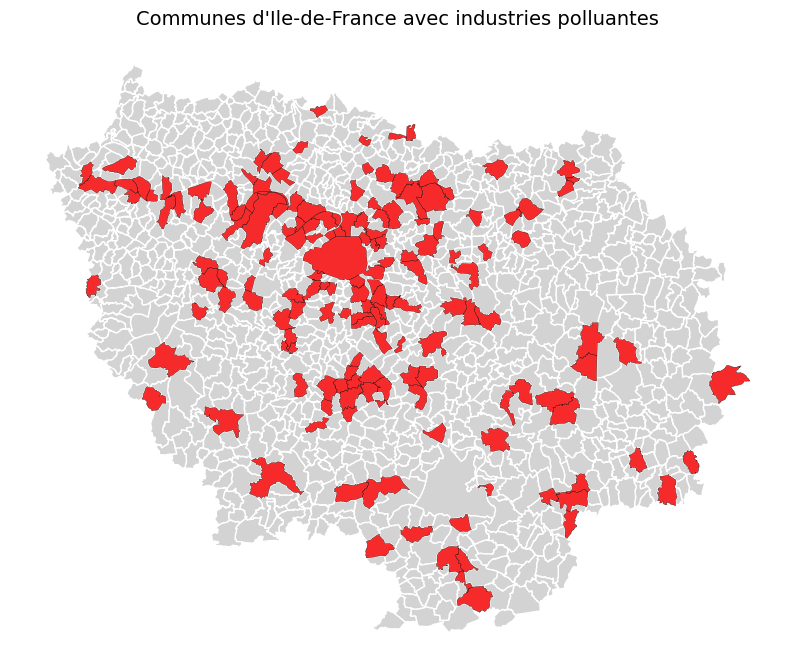

In [ ]:
#### On visualise comme d'habitude

import re

# On s'assure qu'on a bien un GeoDataFrame 
communes_idf_pauvrete = gpd.GeoDataFrame(communes_idf_pauvrete)

# Nettoyage de la colonne taux_pauvrete
def clean_numeric(val):
    if val is None:
        return None
    val = str(val)
    val = re.sub(r'[^0-9\.,-]', '', val)  
    val = val.replace(',', '.')            
    try:
        return float(val)
    except:
        return None

communes_idf_pauvrete['taux_pauvrete'] = communes_idf_pauvrete['taux_pauvrete'].apply(clean_numeric)

# On charge l'epsg
communes_idf_pauvrete = communes_idf_pauvrete.to_crs(epsg=2154)

# On crée le graphique
fig, ax = plt.subplots(figsize=(10, 10))

communes_idf_pauvrete.plot(ax=ax, color='lightgrey', edgecolor='white')

communes_idf_pauvrete.plot(
    column="taux_pauvrete",
    cmap="Reds",
    legend=True,
    edgecolor="black",
    linewidth=0.3,
    ax=ax
)

ax.set_title("Taux de pauvreté des communes d'Ile-de-France", fontsize=14)
ax.axis('off')

plt.show()

# On met en dessous le graphique sur la pollution
fig, ax = plt.subplots(figsize=(10, 10))
communes_idf_statut.plot(ax=ax, color='lightgrey', edgecolor='white')
communes_idf_statut[communes_idf_statut["Polluee"]].plot(
    ax=ax,
    color='red',
    edgecolor='black',
    linewidth=0.3,
    alpha=0.8
)
ax.set_title("Communes d'Ile-de-France avec industries polluantes", fontsize=14)
ax.axis('off')
plt.show()

In [ ]:
### On voudrait tester tout ça !!

import numpy as np

# On crée un df avec le taux de pauvreté (si connu) et la pollution (variable binaire), et on le nettoie
communes_idf_pollution_pauvrete = communes_idf_complet.copy()
communes_idf_pollution_pauvrete = communes_idf_pollution_pauvrete[['insee', 'nom', 'surf_ha', 'geometry', 'departement', 'TP6021', 'Polluee']]
communes_idf_pollution_pauvrete = communes_idf_pollution_pauvrete.rename(columns={"TP6021" : "taux_pauvrete"})
communes_idf_pollution_pauvrete["taux_pauvrete"] = communes_idf_pollution_pauvrete["taux_pauvrete"].replace("s", np.nan
).str.replace(",", ".", regex = False).astype(float)

# On construit un modèle de régression linéaire
from sklearn.linear_model import LinearRegression
reg_pauvrete_pollution = LinearRegression()
communes_idf_pollution_pauvrete = communes_idf_pollution_pauvrete.dropna(subset=["taux_pauvrete"])
reg_pauvrete_pollution.fit(communes_idf_pollution_pauvrete[["Polluee"]],communes_idf_pollution_pauvrete["taux_pauvrete"])
a = reg_pauvrete_pollution.coef_
b = reg_pauvrete_pollution.intercept_
print(a,b)

# On teste statistiquement la significativité par un t-test
from scipy.stats import ttest_ind
pauvrete_polluee = communes_idf_pollution_pauvrete.loc[communes_idf_pollution_pauvrete["Polluee"] == 1, "taux_pauvrete"]
pauvrete_non_polluee = communes_idf_pollution_pauvrete.loc[communes_idf_pollution_pauvrete["Polluee"] == 0, "taux_pauvrete"]
t_stat, p_value = ttest_ind(pauvrete_polluee, pauvrete_non_polluee, equal_var=False)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3e}")

# On fait la même chose avec un test de Cohen
mean1 = pauvrete_polluee.mean()
mean0 = pauvrete_non_polluee.mean()
std1 = pauvrete_polluee.std()
std0 = pauvrete_non_polluee.std()
n1 = len(pauvrete_polluee)
n0 = len(pauvrete_non_polluee)
s_pooled = np.sqrt(((n1-1)*std1**2 + (n0-1)*std0**2) / (n1+n0-2))
cohens_d = (mean1 - mean0) / s_pooled
print("Cohen's d:", cohens_d)

# On calcule le R^2
eta_squared = t_stat**2 / (t_stat**2 + n1 + n0 - 2)
print("eta squared:", eta_squared)

## On fait une régression logistique
import statsmodels.api as sm
y_polluee_idf = communes_idf_pollution_pauvrete["Polluee"] # variable "expliquée"
X_pauvrete_idf = communes_idf_pollution_pauvrete["taux_pauvrete"] # variable "explicative"
X_pauvrete_idf = sm.add_constant(X_pauvrete_idf) # on ajoute l'intercept
logit_model = sm.Logit(y_polluee_idf, X_pauvrete_idf)
result = logit_model.fit()
print(result.summary())
# Coefficients du modèle
params = result.params
# Odd-ratios
odds_ratios = np.exp(params)
print("Odds ratios :")
print(odds_ratios)
#IC des odd-ratios
conf = result.conf_int()
conf_odds_ratios = np.exp(conf)
conf_odds_ratios.columns = ["2.5%", "97.5%"]
print("\nIntervalles de confiance des odds ratios :")
print(conf_odds_ratios)
# Pseudo R^2
pseudo_r2 = 1 - result.llf / result.llnull
print("\nPseudo R² (McFadden) :", pseudo_r2)

[4.83697456] 11.991150442477876
t-statistic: 5.548, p-value: 9.621e-08
Cohen's d: 0.6398022026153118
eta squared: 0.062080414185888666
Optimization terminated successfully.
         Current function value: 0.551838
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Polluee   No. Observations:                  467
Model:                          Logit   Df Residuals:                      465
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Dec 2025   Pseudo R-squ.:                 0.06036
Time:                        07:55:01   Log-Likelihood:                -257.71
converged:                       True   LL-Null:                       -274.26
Covariance Type:            nonrobust   LLR p-value:                 8.723e-09
                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

In [19]:
# On ouvre le df avec la pollution de l'air
url_pollution_air = "https://www.data.gouv.fr/api/1/datasets/r/da7a4869-b584-48ad-8a81-784a02eb297a"
pollution_air = pd.read_csv(url_pollution_air) 
pollution_air.shape

# On se restreint aux mesures de 2018 (les plus récentes)
pollution_air_2018 = pollution_air[pollution_air['date'] == '01/04/2018'].copy()

# S'assurer que la colonne est bien au format string
pollution_air_2018['ninsee'] = pollution_air_2018['ninsee'].astype(str)

# Garder seulement les codes INSEE de 5 chiffres ou plus
pollution_air_2018 = pollution_air_2018[pollution_air_2018['ninsee'].str.len() >= 5]


In [20]:
#### On fait à nouveau la jointure avec notre df précédent

# On renomme la variable CODGEO en "insee" pour que ce soit homogène
pollution_air_2018 = pollution_air_2018.rename(columns={"ninsee":"insee"})

# On s'assure que la variable "insee" est similaire dans les deux tableaux
communes_idf_complet['insee'] = communes_idf_complet['insee'].astype(str).str.zfill(5)  # zfill remplit de zéros à gauche pour atteindre 5 signes (pour harmoniser à la norme INSEE)
pollution_air_2018['insee'] = pollution_air_2018['insee'].astype(str).str.zfill(5)

# On fusionne
communes_idf_pollution = pd.merge(communes_idf_complet, pollution_air_2018, on="insee") 
communes_idf_pollution.shape

(1266, 1986)

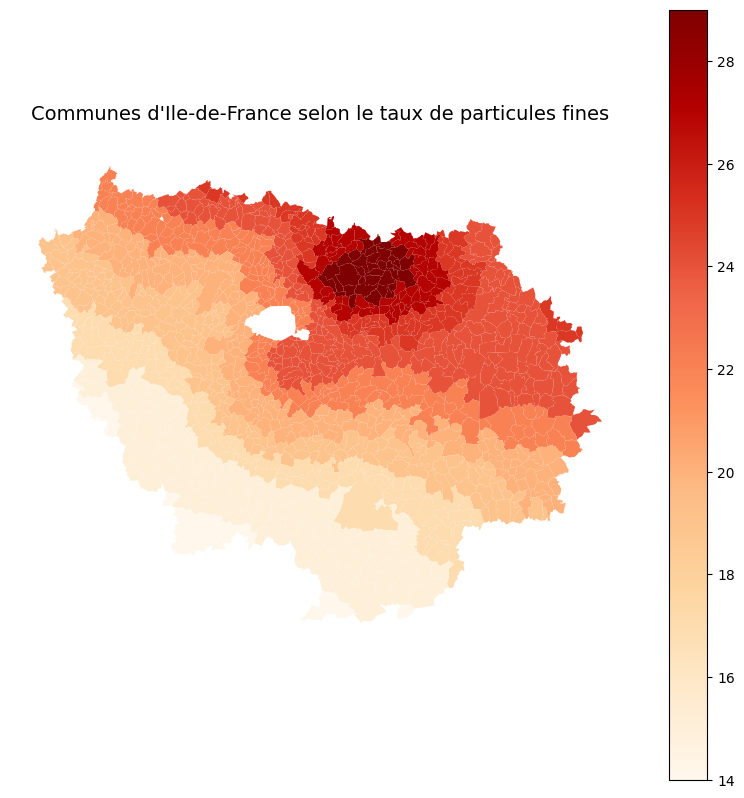

In [21]:
# On s'assure qu'on a bien un GeoDataFrame et on charge l'epsg=2154
communes_idf_pollution= gpd.GeoDataFrame(communes_idf_pollution)
communes_idf_pollution= communes_idf_pollution.to_crs(epsg=2154)

# On crée les axes
fig, ax = plt.subplots(figsize=(10, 10))

# On projette le fonds gris
communes_idf_pollution.plot(ax=ax, color='lightgrey', edgecolor='white')

# On colorie selon le taux de PM10
communes_idf_pollution.plot(
    ax=ax,
    column="pm10",
    legend=True,
    cmap="OrRd",
)

# On donne un titre
ax.set_title("Communes d'Ile-de-France selon le taux de particules fines", fontsize=14)
ax.axis('off')

plt.show()


In [78]:
communes_idf_pollution["pm10"]

0       24
1       22
2       19
3       19
4       19
        ..
1261    22
1262    25
1263    25
1264    25
1265    25
Name: pm10, Length: 1266, dtype: int64

In [22]:
!pip install libpysal
!pip install esda

In [23]:
### On est surpris que la relation soit si claire : on vérifie le tout !

# On commence par vérifier que ce n'est pas une erreur de visualisation, et qu'on trouve bien un lien dans les données entre la localisation et les PM10
communes_idf_pollution['centroid'] = communes_idf_pollution.geometry.centroid # on crée une variable avec le centroïd pour chaque ville
communes_idf_pollution['x'] = communes_idf_pollution.centroid.x # on enregistre ses coordonnées est-ouest (longitude)
communes_idf_pollution['y'] = communes_idf_pollution.centroid.y # idem en nord-sud (latitude)
communes_idf_pollution[['x', 'pm10']].corr() # on mesure la corrélation longitude / pm10
communes_idf_pollution[['y', 'pm10']].corr() # on mesure la corrélation latitude / pm10

# Pour aller plus loin, on fait un test de Moran (???)

,y,pm10
y,1.000000,0.670994
pm10,0.670994,1.000000


(np.float64(578677.6648573534),
 np.float64(748960.2127077241),
 np.float64(6773759.115010327),
 np.float64(6911676.700154755))

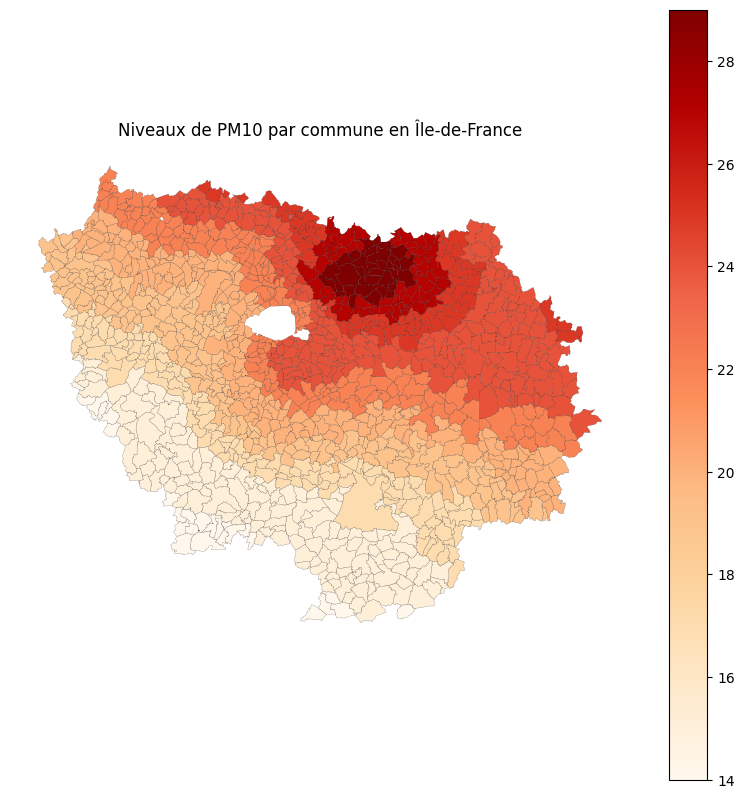

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
communes_idf_pollution.plot(
    column="pm10",
    legend=True,
    cmap="OrRd",  # rouge / orange
    ax=ax,
    edgecolor="black",
    linewidth=0.1
)

ax.set_title("Niveaux de PM10 par commune en Île-de-France")
ax.axis("off")

In [ ]:

import numpy as np

# On crée un df avec le taux de pauvreté (si connu) et la pollution (variable binaire), et on le nettoie
communes_idf_reg_pollution = communes_idf_pollution.copy()
communes_idf_reg_pollution = communes_idf_reg_pollution[['insee', 'nom', 'surf_ha', 'geometry', 'departement', 'TP6021', 'pm10']]
communes_idf_reg_pollution = communes_idf_reg_pollution.rename(columns={"TP6021" : "taux_pauvrete"})
communes_idf_reg_pollution["taux_pauvrete"] = communes_idf_reg_pollution["taux_pauvrete"].replace("s", np.nan
).str.replace(",", ".", regex = False).astype(float)

# On construit un modèle de régression linéaire
from sklearn.linear_model import LinearRegression
reg2_pauvrete_pollution = LinearRegression()
communes_idf_reg_pollution = communes_idf_reg_pollution.dropna(subset=["taux_pauvrete"])
reg2_pauvrete_pollution.fit(communes_idf_reg_pollution[["pm10"]],communes_idf_reg_pollution["taux_pauvrete"])
a = reg2_pauvrete_pollution.coef_
b = reg2_pauvrete_pollution.intercept_
print(a,b)

[0.53711051] 1.7413835854202802


In [ ]:
# On teste statistiquement la significativité par un t-test
from scipy.stats import ttest_ind
pauvrete_polluee = communes_idf_reg_pollution.loc[communes_idf_reg_pollution["Polluee"] == 1, "taux_pauvrete"]
pauvrete_non_polluee = communes_idf_pollution_pauvrete.loc[communes_idf_pollution_pauvrete["Polluee"] == 0, "taux_pauvrete"]
t_stat, p_value = ttest_ind(pauvrete_polluee, pauvrete_non_polluee, equal_var=False)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3e}")

In [44]:
communes_idf_pollution.columns

Index(['insee', 'nom', 'wikipedia', 'surf_ha', 'geometry', 'departement',
       'Polluee', 'P22_POP', 'P22_POP0014', 'P22_POP1529',
       ...
       'BPE_2024_D281', 'BPE_2024_D307', 'BPE_2024_F307', 'date', 'no2', 'o3',
       'pm10', 'centroid', 'x', 'y'],
      dtype='object', length=1989)

In [61]:
## On crée un df avec nos variables d'intérêt (amené à s'élargir)
df_final = communes_idf_pollution.copy()
df_final = df_final[['insee', 'nom', 'surf_ha', 'geometry', 'departement', 'TP6021', 'MED21', 'SNEMM_23', 'P22_POP', 'Polluee', 'date', 'no2', 'o3',
       'pm10', 'centroid', 'x', 'y']]

In [ ]:
## On cherche d'autres variables que la pauvreté (avec moins de NAs)

# REVENU MOYEN
communes_idf_pollution["SNEMM_23"].value_counts() # 0 "s"
communes_idf_pollution["SNEMM_23"].isna().sum() # 740 NAs
# ==> Au total, 740 manquants pour le revenu moyen

# REVENU MEDIAN
communes_idf_pollution["MED21"].value_counts() # 15 "s"
communes_idf_pollution["MED21"].isna().sum() # 0 NA
# ==> Au total, 15 manquants pour le revenu médian

# PAUVRETE
communes_idf_pollution["TP6021"].value_counts() # 800 "s"
communes_idf_pollution["TP6021"].isna().sum() # 0 NA
# ==> Au total, 800 manquants pour le revenu médian

## ==> On choisit le revenu médian pour estimer le niveau de vie

np.int64(0)

In [73]:
## Nettoyage du revenu médian

# on voit que ces villes ne sont décrites par aucune de nos trois variables (pauvreté et revenu moyen non plus) ; et sont très petites (max 70 habitants)
df_final[df_final['MED21'] == 's']

# on filtre donc notre df
df_final = df_final[df_final['MED21'] != 's']

df_final.shape

(1251, 17)

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

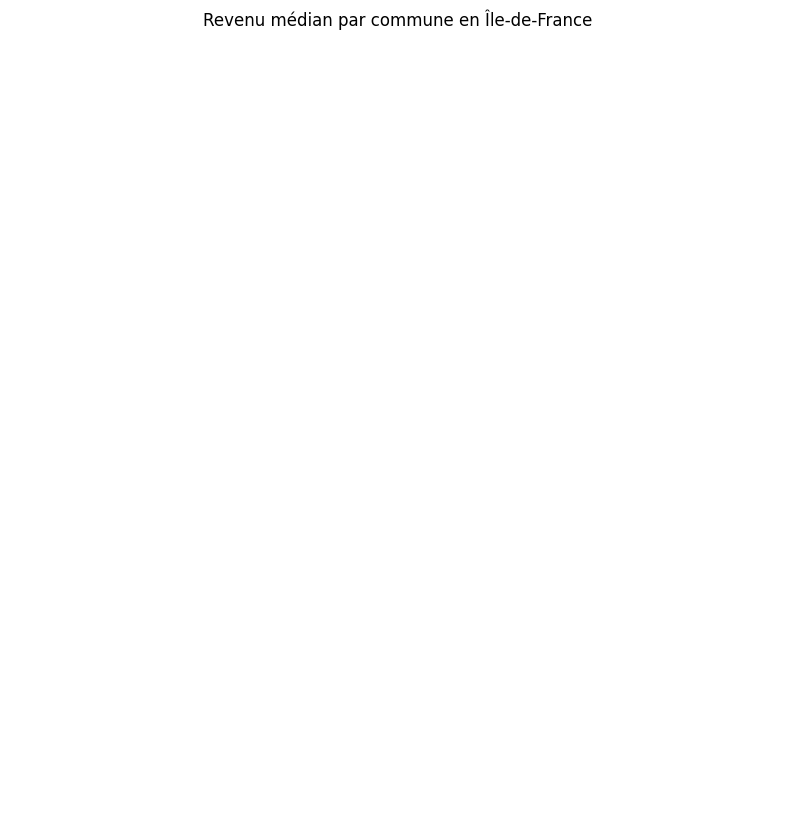

In [77]:
fig, ax = plt.subplots(figsize=(10, 10))
df_final.plot(
    column="MED21",
    legend=True,
    cmap="OrRd",  # rouge / orange
    ax=ax,
    edgecolor="black",
    linewidth=0.1
)
ax.set_title("Revenu médian par commune en Île-de-France")
ax.axis("off")